# Data Exploration

The prepared data is ready to be analysed and help us arrive to conclusions about our dataset, allowing for a better understanding of the subject and how it will impact future search system design choices.

Firstly we import all of the relevant packages for the data analysis.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
import calendar

In [121]:
ch = pd.read_json("data/chega.json") #default
psd = pd.read_json("data/psd.json")
il = pd.read_json("data/il.json")

df.shape

(3497, 5)

## Webpages and Size

### Number of Webpages per Month per Political Group

In [48]:
def pages_per_month(df):
    group_by_month = df['text'].groupby(by=[df['date'].dt.month])

    pages_per_month = group_by_month.count().reset_index()
    pages_per_month.rename({'date': 'Month', 'text': 'Number of Pages'}, axis='columns', inplace=True)
    pages_per_month['Month'] = pages_per_month['Month'].apply(lambda x: calendar.month_abbr[x])

    return pages_per_month

In [49]:
ps_pages = pages_per_month(ch)
ps_pages 

,Month,Number of Pages
0,Jan,205
1,Feb,113
2,Mar,110
3,Apr,150
4,May,793
5,Jun,567
6,Jul,557
7,Aug,17
8,Sep,38
9,Oct,781


In [50]:
psd_pages = pages_per_month(psd)
psd_pages 

,Month,Number of Pages
0,Jan,488
1,Feb,2443
2,Mar,2915
3,Apr,3740
4,May,2447
5,Jun,2227
6,Jul,2955
7,Aug,2350
8,Sep,1130
9,Oct,4061


In [51]:
ch_pages = pages_per_month(ch)
ch_pages 

,Month,Number of Pages
0,Jan,205
1,Feb,113
2,Mar,110
3,Apr,150
4,May,793
5,Jun,567
6,Jul,557
7,Aug,17
8,Sep,38
9,Oct,781


#### Plot:

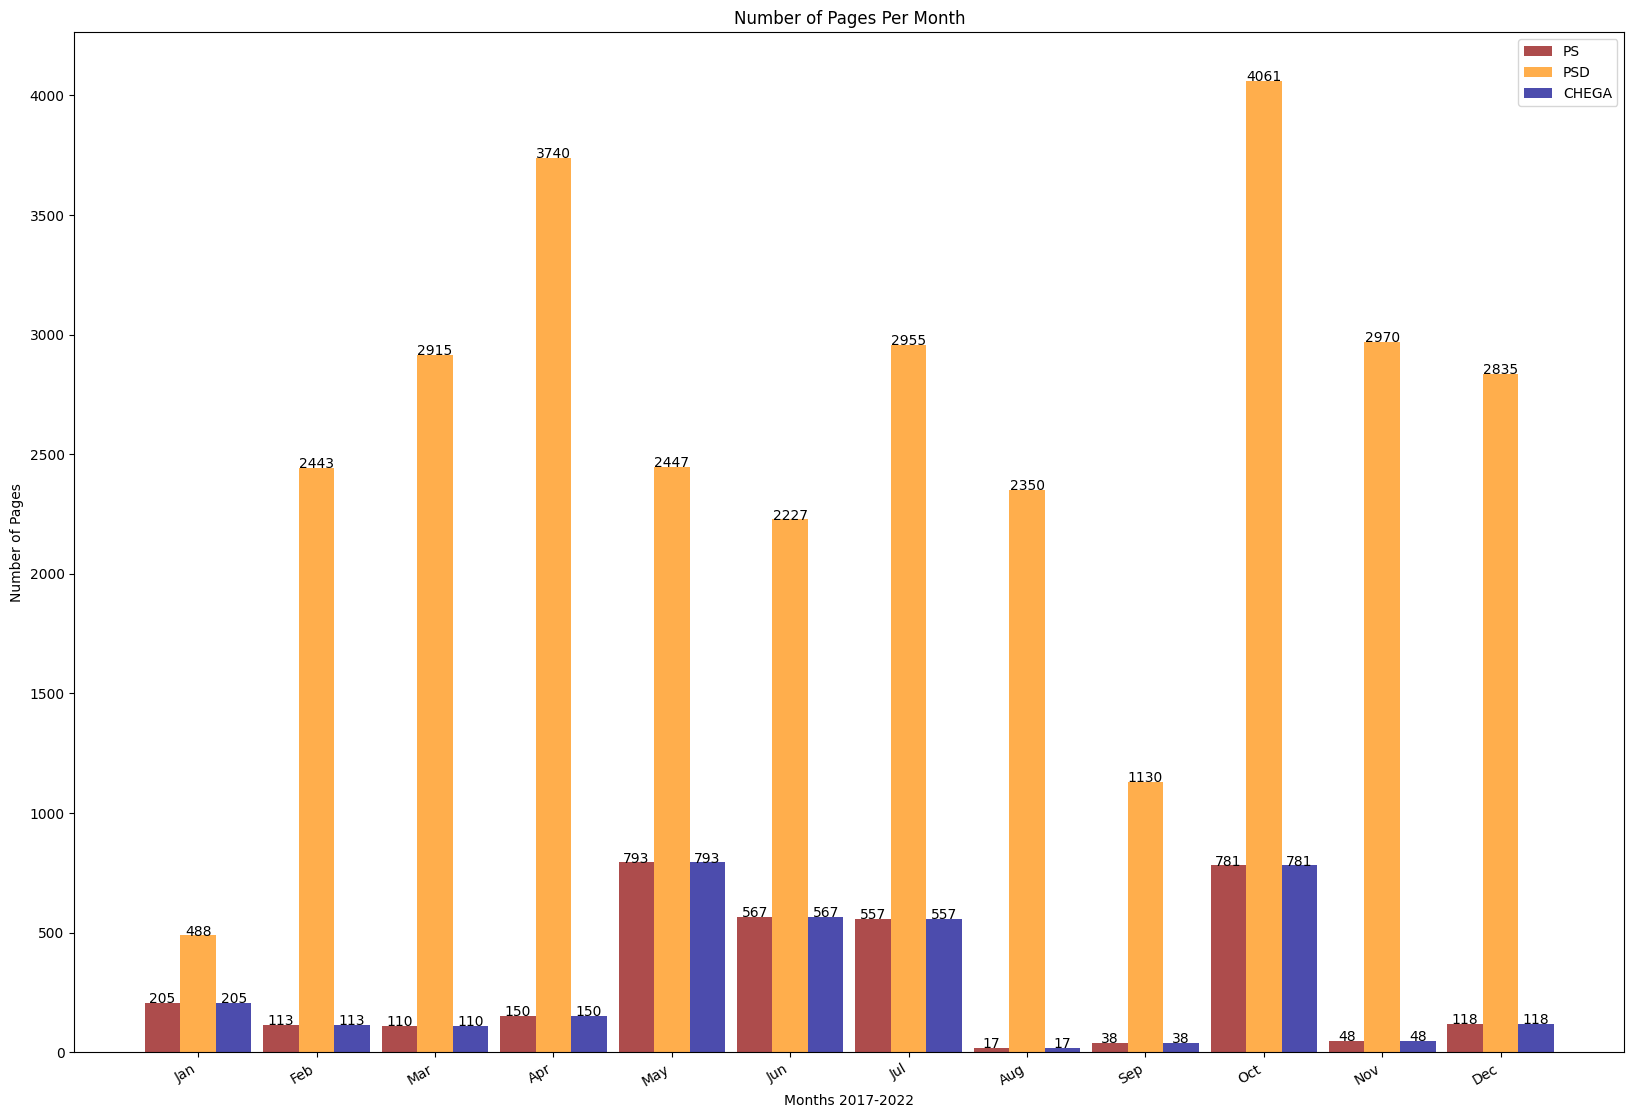

In [52]:
fig, ax = plt.subplots(figsize=(20, 15))
x_axis = np.arange(12)
width = 0.3

for x, y in enumerate(ps_pages['Number of Pages'].tolist()):
     ax.annotate(y, (x - width, y), ha='center')
for x, y in enumerate(psd_pages['Number of Pages'].tolist()):
     ax.annotate(y, (x, y), ha='center')
for x, y in enumerate(ch_pages['Number of Pages'].tolist()):
     ax.annotate(y, (x + width, y), ha='center')

plt.bar(x_axis - width, ps_pages['Number of Pages'].tolist(), width, alpha=0.7, color= "darkred", label='PS')
plt.bar(x_axis, psd_pages['Number of Pages'].tolist(), width, alpha=0.7, color= "darkorange", label="PSD")
plt.bar(x_axis + width, ch_pages['Number of Pages'].tolist(), width, alpha=0.7, color= "darkblue", label="CHEGA")

plt.xticks(x_axis, ps_pages['Month'].tolist())
plt.legend(["PS", "PSD", "CHEGA"])
plt.title('Number of Pages Per Month')
plt.xlabel('Months 2017-2022')
plt.ylabel('Number of Pages')

fig.autofmt_xdate()

plt.show()

### Number of Webpages Through Time per Political Groups

In [53]:
def pages_through_time(df, start, end):
    group_by_year = df['text'].groupby(by=[df['date'].dt.year])

    pages_through_time = group_by_year.count().reset_index()
    pages_through_time.rename({'date': 'Year', 'text': 'Number of Pages'}, axis='columns', inplace=True)

    pages_through_time = pages_through_time.merge(how='right', on=['Year'], right = pd.DataFrame({'Year':np.arange(start, end)})).sort_values(by=["Year"]).reset_index().fillna(int(0)).drop(['index'], axis=1)

    return pages_through_time

In [54]:
ps_pages = pages_through_time(ch, 2017, 2022)
ps_pages

,Year,Number of Pages
0,2017,0.0
1,2018,0.0
2,2019,2781.0
3,2020,716.0
4,2021,0.0


In [55]:
psd_pages = pages_through_time(psd, 2017, 2022)
psd_pages

,Year,Number of Pages
0,2017,9855
1,2018,6452
2,2019,10963
3,2020,3290
4,2021,1


In [56]:
ch_pages = pages_through_time(ch, 2017, 2022)
ch_pages

,Year,Number of Pages
0,2017,0.0
1,2018,0.0
2,2019,2781.0
3,2020,716.0
4,2021,0.0


#### Bar Plot

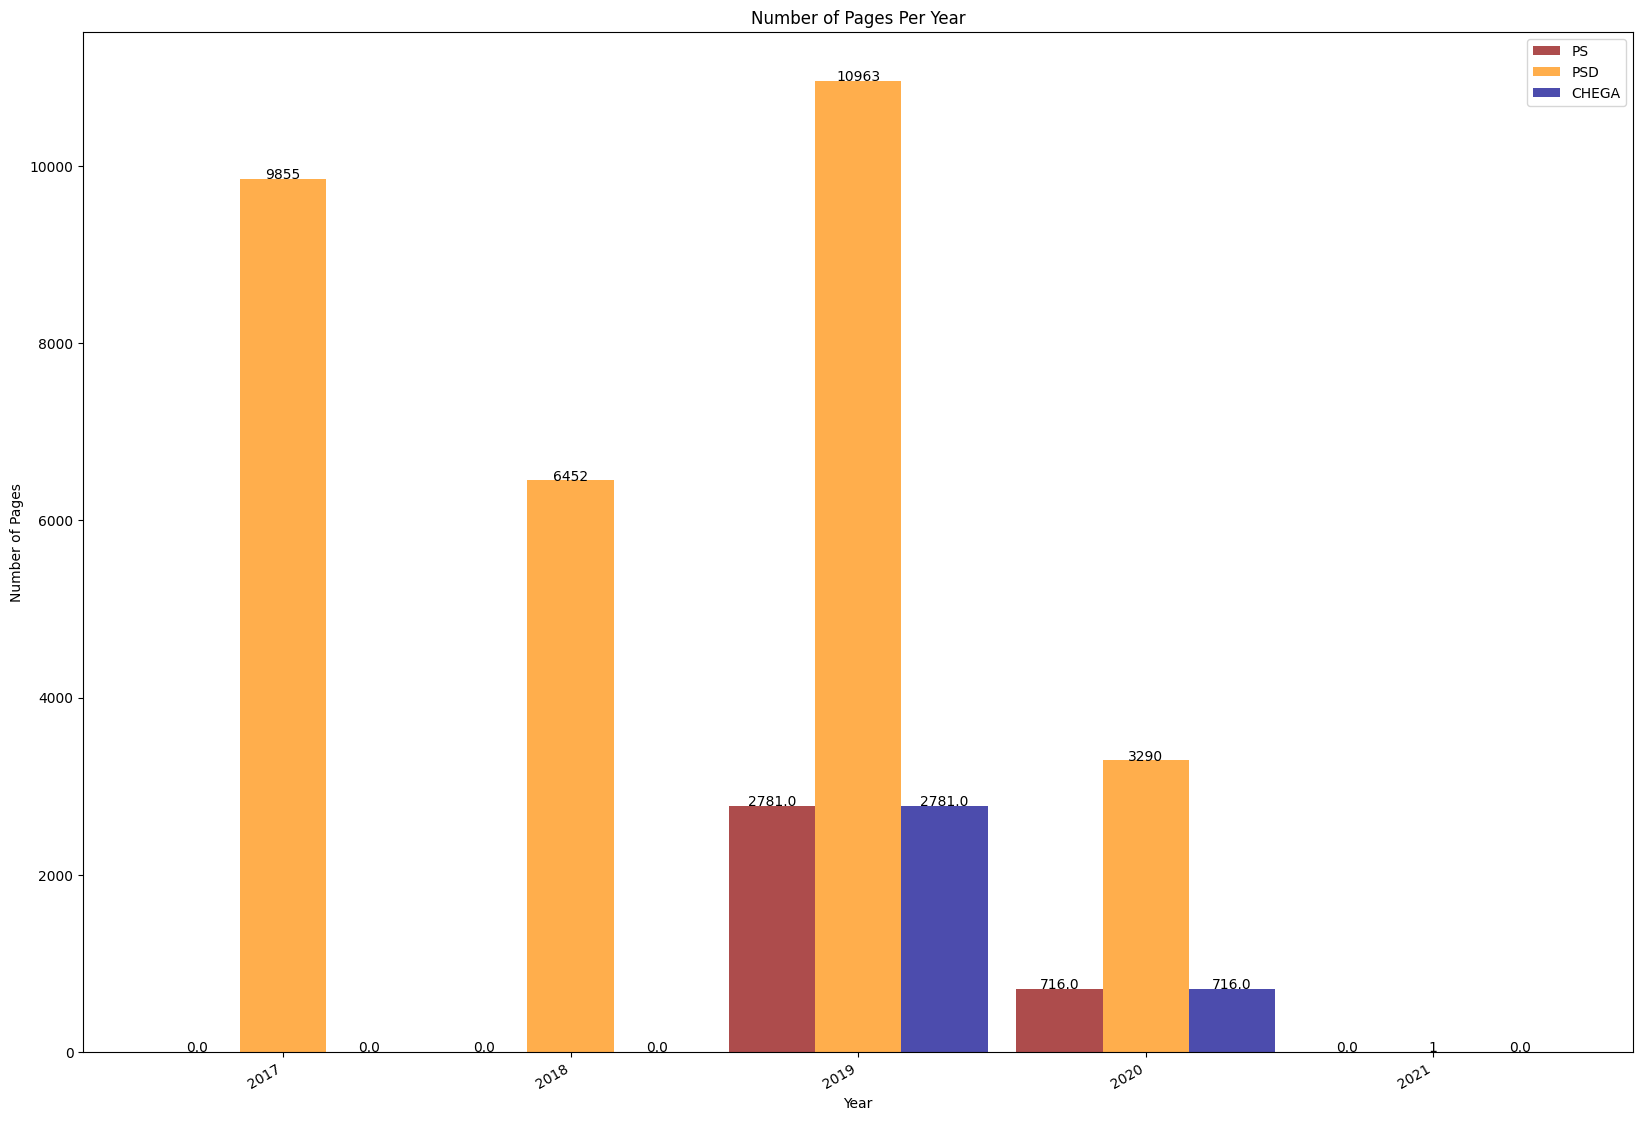

In [57]:
fig, ax = plt.subplots(figsize=(20, 15))
x_axis = np.arange(5)
width = 0.3

for x, y in enumerate(ps_pages['Number of Pages'].tolist()):
     ax.annotate(y, (x - width, y), ha='center')
for x, y in enumerate(psd_pages['Number of Pages'].tolist()):
     ax.annotate(y, (x, y), ha='center')
for x, y in enumerate(ch_pages['Number of Pages'].tolist()):
     ax.annotate(y, (x + width, y), ha='center')

plt.bar(x_axis - width, ps_pages['Number of Pages'].tolist(), width, alpha=0.7, color= "darkred", label='PS')
plt.bar(x_axis, psd_pages['Number of Pages'].tolist(), width, alpha=0.7, color= "darkorange", label="PSD")
plt.bar( x_axis + width, ch_pages['Number of Pages'].tolist(), width, alpha=0.7, color= "darkblue", label="CHEGA")

plt.xticks(x_axis, ps_pages['Year'].tolist())
plt.legend(["PS", "PSD", "CHEGA"])
plt.title('Number of Pages Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Pages')

fig.autofmt_xdate()

plt.show()

#### Line Chart

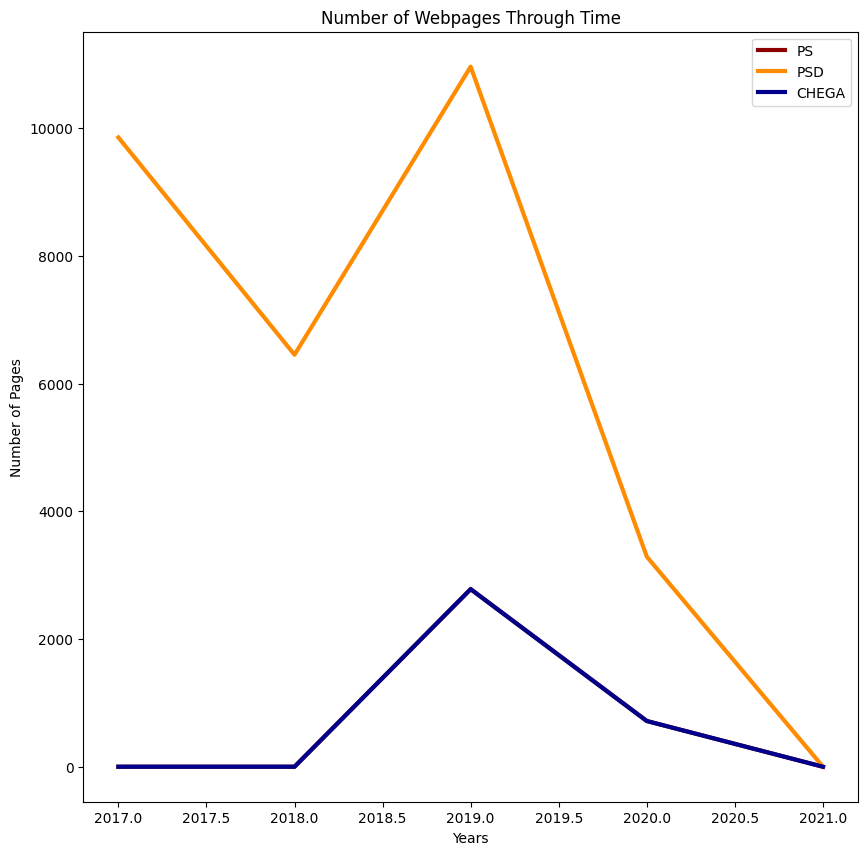

In [58]:
fig, ax = plt.subplots(figsize=(10, 10))

plt.title("Number of Webpages Through Time")
plt.ylabel("Number of Pages")
plt.xlabel("Years")

plt.plot(ps_pages['Year'].tolist(), ps_pages['Number of Pages'].tolist(), color="darkred", linewidth=3)
plt.plot(psd_pages['Year'].tolist(), psd_pages['Number of Pages'].tolist(), color="darkorange", linewidth=3)
plt.plot(ch_pages['Year'].tolist(), ch_pages['Number of Pages'].tolist(), color="darkblue", linewidth=3)

plt.legend(["PS", "PSD", "CHEGA"])

plt.show()

### Number of Webpages of all Parties

In [59]:
pages_data = {'Number of Pages': [ps_pages['Number of Pages'].mean(), psd_pages['Number of Pages'].mean(), ch_pages['Number of Pages'].mean()],
              'Min': [ps_pages['Number of Pages'].min(), psd_pages['Number of Pages'].min(), ch_pages['Number of Pages'].min()],
              'Max': [ps_pages['Number of Pages'].max(), psd_pages['Number of Pages'].max(), ch_pages['Number of Pages'].max()]}
total_pages = pd.DataFrame(pages_data, ['PS', 'PSD', 'CH'])
total_pages

,Number of Pages,Min,Max
PS,699.4,0.0,2781.0
PSD,6112.2,1.0,10963.0
CH,699.4,0.0,2781.0


### Length of the Text per Month per Political Group

In [60]:
def length_stats_per_month(df):
    group_by_month = df['text'].groupby(by=[df['date'].dt.month])

    avg_text_lenght_per_month = group_by_month.apply(lambda x: np.mean(x.str.len())).rename('Average')
    min_text_lenght_per_month = group_by_month.apply(lambda x: np.min(x.str.len())).rename('Min')
    max_text_lenght_per_month = group_by_month.apply(lambda x: np.max(x.str.len())).rename('Max')
    std_text_lenght_per_month = group_by_month.apply(lambda x: np.std(x.str.len())).rename('Std')

    text_length_per_month = pd.concat([avg_text_lenght_per_month, min_text_lenght_per_month, max_text_lenght_per_month, std_text_lenght_per_month], axis=1).reset_index()
    text_length_per_month.rename({'date': 'Month'}, axis='columns', inplace=True)
    text_length_per_month['Month'] = text_length_per_month['Month'].apply(lambda x: calendar.month_abbr[x])
    
    return text_length_per_month

In [61]:
ps_length_stats = length_stats_per_month(ch)
ps_length_stats

,Month,Average,Min,Max,Std
0,Jan,20477.775610,0,151217,49770.620135
1,Feb,13022.132743,0,151528,40754.767682
2,Mar,6099.481818,0,151440,28244.886255
3,Apr,4684.740000,0,151258,24293.165491
4,May,1597.818411,0,151343,11097.568019
5,Jun,968.463845,0,44771,3523.089728
6,Jul,971.429084,0,44803,3545.340508
7,Aug,258.470588,0,3301,792.966887
8,Sep,4694.736842,0,155980,24893.364926
9,Oct,2528.898848,0,155988,14039.331579


In [62]:
psd_length_stats = length_stats_per_month(psd)
psd_length_stats

,Month,Average,Min,Max,Std
0,Jan,3496.655738,0,386417,22761.110542
1,Feb,4562.983217,0,664851,21307.425524
2,Mar,4155.739966,0,1214451,30033.850122
3,Apr,6062.555615,0,1214451,36103.632653
4,May,4822.082550,0,1214451,35873.935993
5,Jun,6044.823529,0,1214451,40051.458936
6,Jul,5778.649408,0,1214451,39126.827306
7,Aug,4748.490213,0,215981,12013.176973
8,Sep,3670.722124,0,904338,36320.665765
9,Oct,6279.373553,0,1214451,41048.733308


In [63]:
ch_length_stats = length_stats_per_month(ch)
ch_length_stats

,Month,Average,Min,Max,Std
0,Jan,20477.775610,0,151217,49770.620135
1,Feb,13022.132743,0,151528,40754.767682
2,Mar,6099.481818,0,151440,28244.886255
3,Apr,4684.740000,0,151258,24293.165491
4,May,1597.818411,0,151343,11097.568019
5,Jun,968.463845,0,44771,3523.089728
6,Jul,971.429084,0,44803,3545.340508
7,Aug,258.470588,0,3301,792.966887
8,Sep,4694.736842,0,155980,24893.364926
9,Oct,2528.898848,0,155988,14039.331579


### Length of the Text per Year per Political Group

In [64]:
def length_stats_per_year(df):
    group_by_year = df['text'].groupby(by=[df['date'].dt.year])

    avg_text_lenght_per_year = group_by_year.apply(lambda x: np.mean(x.str.len())).rename('Average')
    min_text_lenght_per_year = group_by_year.apply(lambda x: np.min(x.str.len())).rename('Min')
    max_text_lenght_per_year = group_by_year.apply(lambda x: np.max(x.str.len())).rename('Max')
    std_text_lenght_per_year = group_by_year.apply(lambda x: np.std(x.str.len())).rename('Std')

    text_length_per_year = pd.concat([avg_text_lenght_per_year, min_text_lenght_per_year, max_text_lenght_per_year, std_text_lenght_per_year], axis=1).reset_index()
    text_length_per_year.rename({'date': 'Year'}, axis='columns', inplace=True)
    
    return text_length_per_year

In [65]:
ps_length_stats = length_stats_per_year(ch)
ps_length_stats

,Year,Average,Min,Max,Std
0,2019,2363.383315,0,155988,14137.076642
1,2020,10983.244413,0,151528,37239.657320


In [66]:
psd_length_stats = length_stats_per_year(psd)
psd_length_stats

,Year,Average,Min,Max,Std
0,2017,4377.847286,0,1214451,25207.862878
1,2018,4920.732641,0,1181592,26427.199457
2,2019,5430.798686,0,1214451,36459.754631
3,2020,11452.405775,0,664851,53777.147353
4,2021,313772.000000,313772,313772,0.000000


In [67]:
ch_length_stats = length_stats_per_year(ch)
ch_length_stats

,Year,Average,Min,Max,Std
0,2019,2363.383315,0,155988,14137.076642
1,2020,10983.244413,0,151528,37239.657320


### Total Length Stats

In [68]:
length_data = {'Length': [ps_length_stats['Average'].mean(), psd_length_stats['Average'].mean(), ch_length_stats['Average'].mean()],
                'Min': [ps_length_stats['Min'].min(), psd_length_stats['Min'].min(), ch_length_stats['Min'].min()],
                'Max': [ps_length_stats['Max'].max(), psd_length_stats['Max'].max(), ch_length_stats['Max'].max()]}
total_length = pd.DataFrame(length_data, ['PS', 'PSD', 'CH'])
total_length

,Length,Min,Max
PS,6673.313864,0,155988
PSD,67990.756878,0,1214451
CH,6673.313864,0,155988


### Length in Text Through Time

## Wordcloud

In [69]:
stop = stopwords.words('portuguese') + ["ser","quer","se","sobre","toda","assim","sendo"]

wordcloud_text=df["text"].str.replace("[$&+:;“”=?@#|'<>.^*()%!,\"\/]"," ",regex=True)
wordcloud_text=wordcloud_text.str.replace("\d","",regex=True)
wordcloud_text=wordcloud_text.str.replace(" +"," ",regex=True)


df_without_stopwords=" ".join(wordcloud_text)

df_without_stopwords=' '.join([word.lower() for word in df_without_stopwords.split(" ") if word.lower() not in (stop)])

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\ASUS/nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.2032.0_x64__qbz5n2kfra8p0\\nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.2032.0_x64__qbz5n2kfra8p0\\share\\nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.2032.0_x64__qbz5n2kfra8p0\\lib\\nltk_data'
    - 'C:\\Users\\ASUS\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


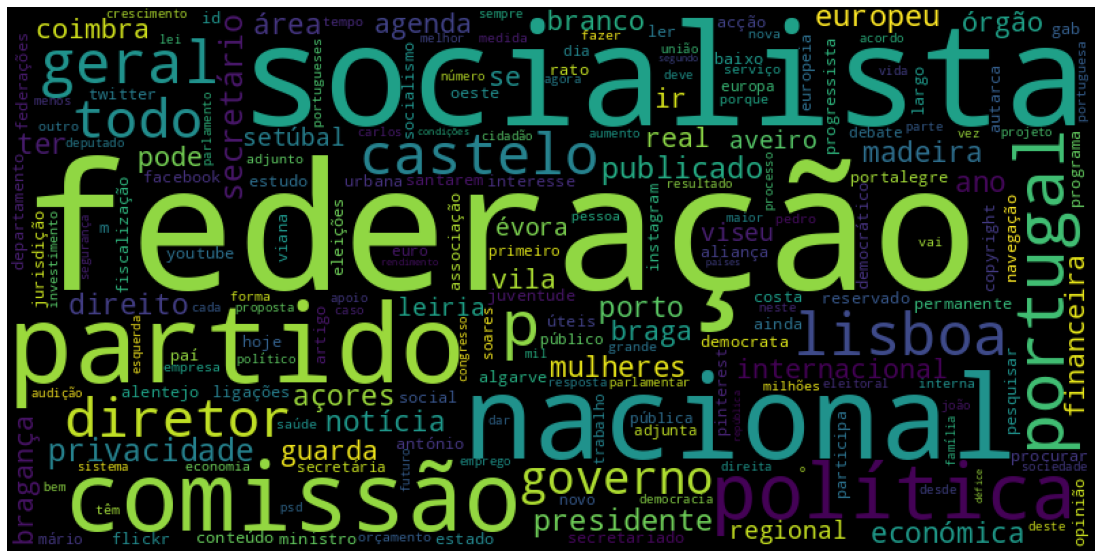

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400,collocations=False).generate(df_without_stopwords)

plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Mention of political groups in Chega

In [119]:
ch["text"] = ch['text'].str.lower().str.replace('[^\w\s]','')
 
word_frequency_ch = ch.text.str.split(expand=True).stack().value_counts().reset_index()
 
word_frequency_ch.columns = ['Word', 'Frequency'] 
 
# print(word_frequency_ch)

ps_frequency_ch = word_frequency_ch.loc[word_frequency_ch['Word'].str.contains("^ps$", case=False)]
psd_frequency_ch = word_frequency_ch.loc[word_frequency_ch['Word'].str.contains("^psd$", case=True)]
il_frequency_ch = word_frequency_ch.loc[word_frequency_ch['Word'].str.contains("^il$", case=True)]

print(ps_frequency_ch.iloc[0]["Frequency"])
print(psd_frequency_ch.iloc[0]["Frequency"])
print(il_frequency_ch.iloc[0]["Frequency"])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20620\4156298524.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  ch["text"] = ch['text'].str.lower().str.replace('[^\w\s]','')


105
175
1


### Pie Chart of the Mentions of political groups in Chega

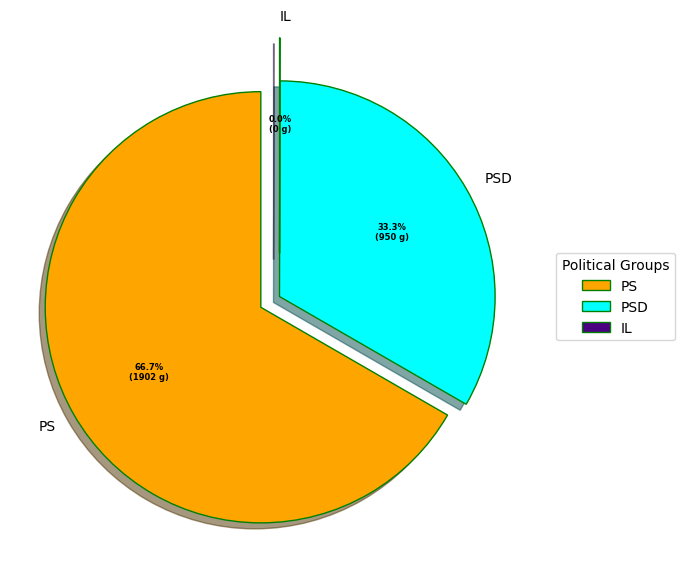

In [136]:
# Creating dataset
political_groups = ['PS', 'PSD', 'IL']
 
data = [ps_frequency_ch.iloc[0]["Frequency"], psd_frequency_ch.iloc[0]["Frequency"],il_frequency_ch.iloc[0]["Frequency"]]
 
# Creating plot
# Creating explode data
explode = (0.1, 0.0, 0.2)
 
# Creating color parameters
colors = ( "orange", "cyan", "indigo")
 
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = political_groups,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
 
# Adding legend
ax.legend(wedges, political_groups,
          title ="Political Groups",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 6, weight ="bold")
# ax.set_title("Customizing pie chart")
 
# show plot
plt.show()

## Mention of political groups in IL

In [123]:
il["text"] = il['text'].str.lower().str.replace('[^\w\s]','')
 
word_frequency_il = il.text.str.split(expand=True).stack().value_counts().reset_index()
 
word_frequency_il.columns = ['Word', 'Frequency'] 
 
ps_frequency_il = word_frequency_il.loc[word_frequency_il['Word'].str.contains("^ps$", case=True)]
ch_frequency_il = word_frequency_il.loc[word_frequency_il['Word'].str.contains("^chega$", case=True)]
psd_frequency_il = word_frequency_il.loc[word_frequency_il['Word'].str.contains("^psd$", case=True)]

print(ps_frequency_il.iloc[0]["Frequency"])
print(ch_frequency_il.iloc[0]["Frequency"])
print(psd_frequency_il.iloc[0]["Frequency"])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20620\1194780269.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  il["text"] = il['text'].str.lower().str.replace('[^\w\s]','')


1902
325
950


### Pie Chart of the Mentions of political groups in IL

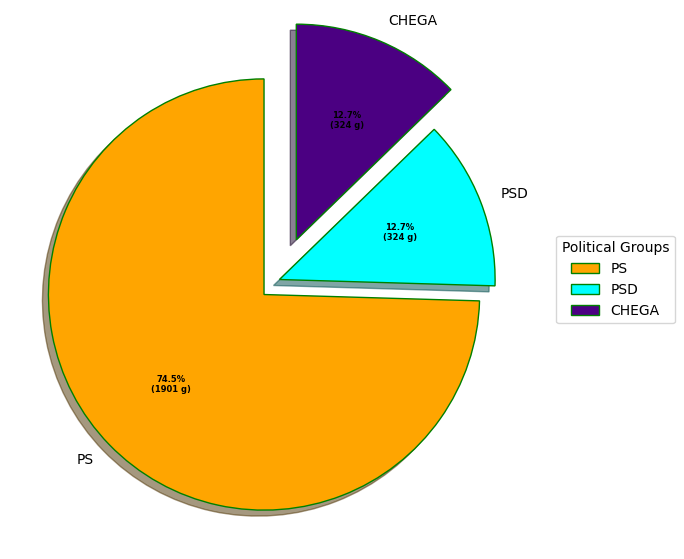

In [137]:
# Creating dataset
political_groups = ['PS', 'PSD', 'CHEGA']
 
data = [ps_frequency_il.iloc[0]["Frequency"], ch_frequency_il.iloc[0]["Frequency"],ch_frequency_il.iloc[0]["Frequency"]]
 
# Creating plot
# Creating explode data
explode = (0.1, 0.0, 0.2)
 
# Creating color parameters
colors = ( "orange", "cyan", "indigo")
 
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = political_groups,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
 
# Adding legend
ax.legend(wedges, political_groups,
          title ="Political Groups",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 6, weight ="bold")
# ax.set_title("Customizing pie chart")
 
# show plot
plt.show()

## Mention of political groups in PS

In [124]:
ps["text"] = ps['text'].str.lower().str.replace('[^\w\s]','')
 
word_frequency_ps = ps.text.str.split(expand=True).stack().value_counts().reset_index()
 
word_frequency_ps.columns = ['Word', 'Frequency'] 
 
il_frequency_ps = word_frequency_ps.loc[word_frequency_ps['Word'].str.contains("^il$", case=True)]
ch_frequency_ps = word_frequency_ps.loc[word_frequency_ps['Word'].str.contains("^chega$", case=True)]
psd_frequency_ps = word_frequency_ps.loc[word_frequency_ps['Word'].str.contains("^psd$", case=True)]

print(il_frequency_ps.iloc[0]["Frequency"])
print(ch_frequency_ps.iloc[0]["Frequency"])
print(psd_frequency_ps.iloc[0]["Frequency"])

NameError: name 'ps' is not defined

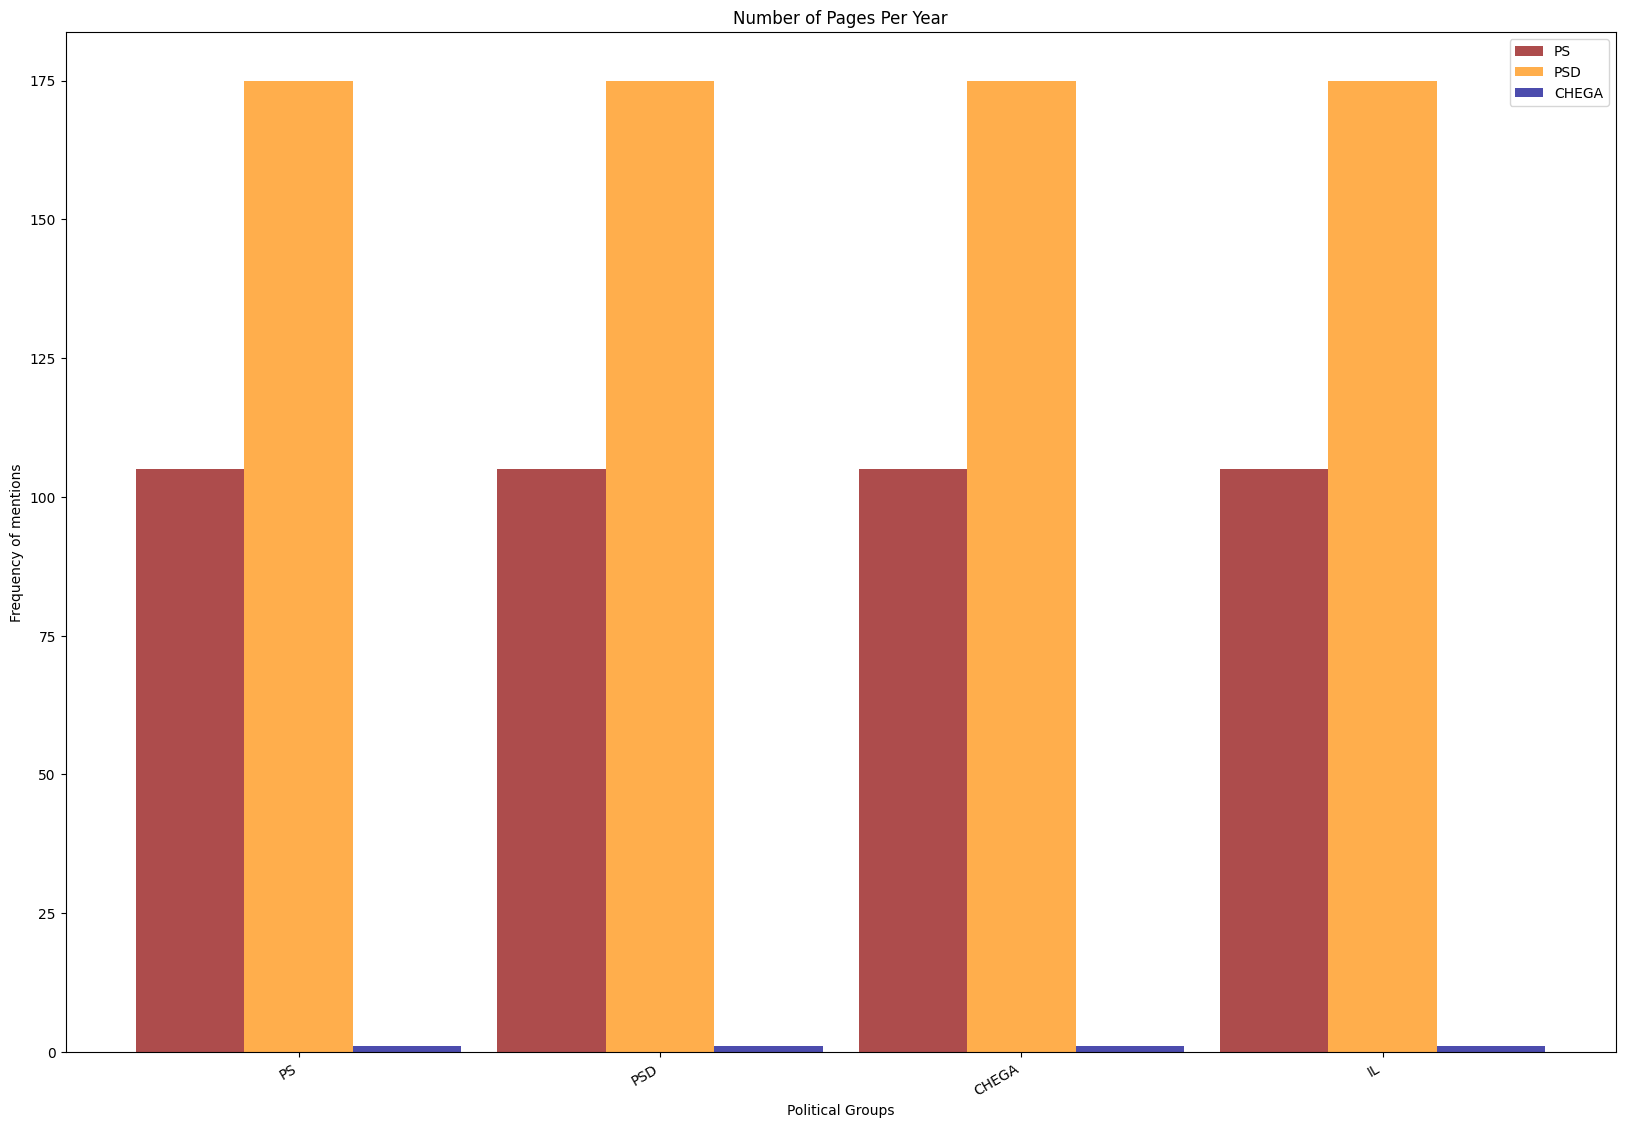

In [110]:
fig, ax = plt.subplots(figsize=(20, 15))
x_axis = np.arange(4)
width = 0.3

# for x, y in enumerate(ps_pages['Number of Pages'].tolist()):
#      ax.annotate(y, (x - width, y), ha='center')

# for x, y in enumerate(ch_pages['Number of Pages'].tolist()):
#      ax.annotate(y, (x + width, y), ha='center')

plt.bar(x_axis - width, ps_frequency_ch.iloc[0]["Frequency"], width, alpha=0.7, color= "darkred", label='PS')
plt.bar(x_axis, psd_frequency_ch.iloc[0]["Frequency"], width, alpha=0.7, color= "darkorange", label="PSD")
# plt.bar( x_axis + width, ch_frequency_ch.iloc[0]["Frequency"], width, alpha=0.7, color= "darkblue", label="CHEGA")
plt.bar( x_axis + width, il_frequency_ch.iloc[0]["Frequency"], width, alpha=0.7, color= "darkblue", label="IL")


plt.xticks(x_axis, ["PS","PSD", "CHEGA", "IL"])
plt.legend(["PS","PSD", "CHEGA", "IL"])
plt.title('Number of Pages Per Year')
plt.xlabel('Political Groups')
plt.ylabel('Frequency of mentions')

fig.autofmt_xdate()

plt.show()